In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import shuffle
from sklearn import svm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support, homogeneity_score, adjusted_mutual_info_score, completeness_score, adjusted_rand_score, v_measure_score
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.preprocessing import FunctionTransformer
from sklearn.utils import shuffle

In [2]:
class1 = ['comp.graphics', 
                       'comp.os.ms-windows.misc', 
                       'comp.sys.ibm.pc.hardware', 
                       'comp.sys.mac.hardware']

class2 = [ 'rec.autos', 
                         'rec.motorcycles', 
                         'rec.sport.baseball', 
                         'rec.sport.hockey' ]

In [3]:
target_names = ['class1', 'class2']

In [4]:
c1_train_x = fetch_20newsgroups(subset='all', categories=class1, shuffle=True, random_state=42)
c2_train_x = fetch_20newsgroups(subset='all', categories=class2, shuffle=True, random_state=42)
comb_train_x = c1_train_x.data + c2_train_x.data


In [5]:
c1_train_y = [1] * len(c1_train_x.target)
c2_train_y = [2] * len(c2_train_x.target)

train_y = c1_train_y + c2_train_y

#comb_train_x, train_y = shuffle(comb_train_x, train_y, random_state=42)

<b>Generating Test Data</b>

In [27]:
'''
def preprocess_data(data):
        letters_only = re.sub("[^a-zA-Z]", " ", data)
        words = letters_only.split()
        words = [w.lower() for w in words if not w.lower() in stopwords.words('english')]
        return(" ".join( words ))
'''

'\ndef preprocess_data(data):\n        letters_only = re.sub("[^a-zA-Z]", " ", data)\n        words = letters_only.split()\n        words = [w.lower() for w in words if not w.lower() in stopwords.words(\'english\')]\n        return(" ".join( words ))\n'

<b>Pre-processing Training and Test data</b>

In [12]:
'''
preproc_train_data = []

for data in comb_train_x:
	preproc_train_data.append(preprocess_data(data))
''''''

<h3>Creating a TFxIDF vector representation of training and test data</h3><br> A CountVectorizer object is created to first build a vocabulary of words and their respective counts, and then transform the sentences by replacing the words with their respective counts. A TfIdfTransformer object is created and then fit on the training dataset to then extract TfIdf features from each document in both training and test datasets. 

In [6]:
'''
vectorizer = CountVectorizer(min_df = 3)
tfidf_transformer = TfidfTransformer()
vec_train_x = vectorizer.fit_transform(preproc_train_data)
tfidf_train_x = tfidf_transformer.fit_transform(vec_train_x)
'''
vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
tfidf_train_x = vectorizer.fit_transform(comb_train_x)

In [7]:
print('Dimensions of the TFIDF matrix are: ' + str(tfidf_train_x.shape))

Dimensions of the TFIDF matrix are: (7882, 27768)


In [8]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=435)
km.fit(tfidf_train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=435, tol=0.0001, verbose=0)

In [9]:
print(contingency_matrix(train_y, km.labels_))

[[3900    3]
 [2296 1683]]


In [10]:
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))

Homogeneity: 0.248
Completeness: 0.331
V-measure: 0.284
Adjusted Rand-Index: 0.173
Adjusted Mutual Info: 0.248


In [61]:
var = []
svd_model = TruncatedSVD(n_components=1000)
train_x2 = svd_model.fit_transform(tfidf_train_x)
for r in range(1, 1001):
    var.append(np.sum(svd_model.explained_variance_ratio_[1:r]) * 100)
    print('Variance Ratio: ' , r,  str(np.sum(svd_model.explained_variance_ratio_[1:r]) * 100))

('Variance Ratio: ', 1, '0.0')
('Variance Ratio: ', 2, '0.5166448269466994')
('Variance Ratio: ', 3, '0.880940213329456')
('Variance Ratio: ', 4, '1.23684032326904')
('Variance Ratio: ', 5, '1.5577589460768813')
('Variance Ratio: ', 6, '1.8129471459982098')
('Variance Ratio: ', 7, '2.0623941820891645')
('Variance Ratio: ', 8, '2.303461996191781')
('Variance Ratio: ', 9, '2.5347092978155015')
('Variance Ratio: ', 10, '2.7530014759556174')
('Variance Ratio: ', 11, '2.968684171483466')
('Variance Ratio: ', 12, '3.1785803546556495')
('Variance Ratio: ', 13, '3.3823038359554323')
('Variance Ratio: ', 14, '3.5818094738132222')
('Variance Ratio: ', 15, '3.7791311796262597')
('Variance Ratio: ', 16, '3.971706153604526')
('Variance Ratio: ', 17, '4.162737328705629')
('Variance Ratio: ', 18, '4.349129799436618')
('Variance Ratio: ', 19, '4.533166628852015')
('Variance Ratio: ', 20, '4.7133491780770855')
('Variance Ratio: ', 21, '4.890561297293069')
('Variance Ratio: ', 22, '5.061993138923464')
(

Text(0,0.5,u'Percent of variance retained')

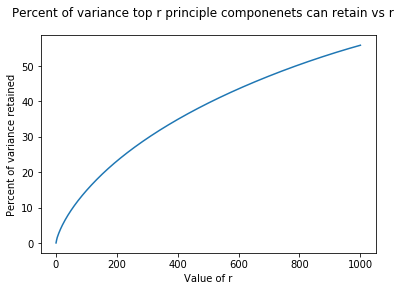

In [63]:
fig = plt.figure()
plt.plot(range(1, 1001), var)
fig.suptitle('Percent of variance top r principle componenets can retain vs r')
plt.xlabel('Value of r')
plt.ylabel('Percent of variance retained')

<h3>Dimensionality Reduction of Training and Test data using Non-Negative Matrix Factorization (NMF)</h3><br>
As the features extracted using TfIdf are both high dimensional and sparse, leading to curse of dimensionality. We perform Non-Negative Matrix Factorization to reduce the number of features. In this method a matrix is factorized into two matrices, with the property that all three matrices have non negative elements.

In [11]:
var = []
r_values = [1, 2, 3, 5, 10, 20, 50, 100, 300]
completeness_values = []
homogeneity_values = []
v_measure_values = []
adjusted_rand_values = []
adjusted_mutual_info_values = []
for r in r_values:
    nmf_model = NMF(n_components=r, init='random', random_state=0)
    train_x = nmf_model.fit_transform(tfidf_train_x)
    km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=35)
    km.fit(train_x)
    print('Contingency Matrix for r: ' + str(r) + '\n' + str(contingency_matrix(train_y, km.labels_)))
    homogeneity_values.append(homogeneity_score(train_y, km.labels_))
    completeness_values.append(completeness_score(train_y, km.labels_))
    v_measure_values.append(v_measure_score(train_y, km.labels_))
    adjusted_rand_values.append(adjusted_rand_score(train_y, km.labels_))
    adjusted_mutual_info_values.append(adjusted_mutual_info_score(train_y, km.labels_))

Contingency Matrix for r: 1
[[2202 1701]
 [2323 1656]]
Contingency Matrix for r: 2
[[3173  730]
 [  36 3943]]
Contingency Matrix for r: 3
[[3890   13]
 [2305 1674]]
Contingency Matrix for r: 5
[[3898    5]
 [2638 1341]]
Contingency Matrix for r: 10
[[3118  785]
 [3977    2]]
Contingency Matrix for r: 20
[[ 669 3234]
 [   2 3977]]
Contingency Matrix for r: 50
[[3367  536]
 [3977    2]]
Contingency Matrix for r: 100
[[ 225 3678]
 [   0 3979]]
Contingency Matrix for r: 300
[[ 111 3792]
 [   0 3979]]


In [48]:
nmf_model = NMF(n_components=2)
train_x = nmf_model.fit_transform(tfidf_train_x)
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=20, random_state=52)
km.fit(train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
print('Contingency Matrix for r: ' + str(2) + '\n' + str(contingency_matrix(train_y, km.labels_)))

print('Dimensions of the TFIDF matrix are: ' + str(tfidf_train_x.shape))

Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.680
Adjusted Rand-Index: 0.777
Adjusted Mutual Info: 0.679
Contingency Matrix for r: 2
[[3594  309]
 [ 158 3821]]
Dimensions of the TFIDF matrix are: (7882, 27768)


In [31]:
nmf_model = NMF(n_components=3)
train_x = nmf_model.fit_transform(tfidf_train_x)
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1, random_state=35)
km.fit(train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_mutual_info_score(train_y, km.labels_))

Homogeneity: 0.229
Completeness: 0.316
V-measure: 0.266
Adjusted Rand-Index: 0.153
Adjusted Rand-Index: 0.229


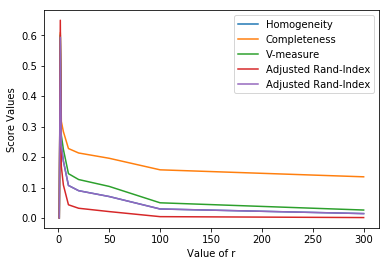

In [67]:
plt.plot(r_values, homogeneity_values)
plt.plot(r_values, completeness_values)
plt.plot(r_values, v_measure_values)
plt.plot(r_values, adjusted_rand_values)
plt.plot(r_values, adjusted_mutual_info_values)
plt.legend(['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand-Index', 'Adjusted Rand-Index'])
plt.xlabel('Value of r')
plt.ylabel('Score Values')
plt.show()

Text(0,0.5,u'Homogeneity Values')

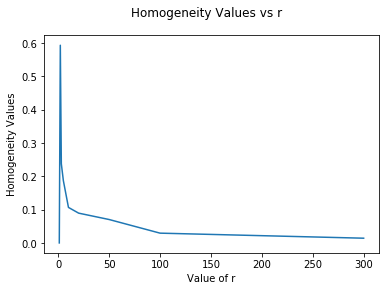

In [39]:
fig = plt.figure()
plt.plot(r_values, homogeneity_values)
fig.suptitle('Homogeneity Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Homogeneity Values')

Text(0,0.5,u'Completeness Values')

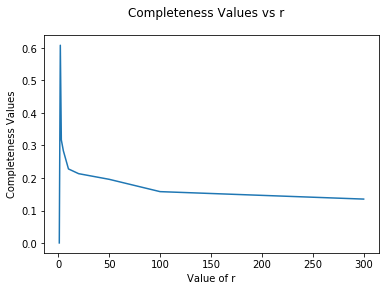

In [40]:
fig = plt.figure()
plt.plot(r_values, completeness_values)
fig.suptitle('Completeness Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Completeness Values')

Text(0,0.5,u'V Measure Values')

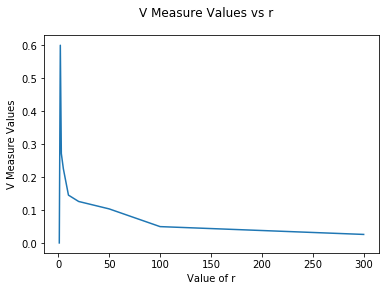

In [41]:
fig = plt.figure()

plt.plot(r_values, v_measure_values)
fig.suptitle('V Measure Values vs r')
plt.xlabel('Value of r')
plt.ylabel('V Measure Values')

Text(0,0.5,u'Adjusted Rand Values')

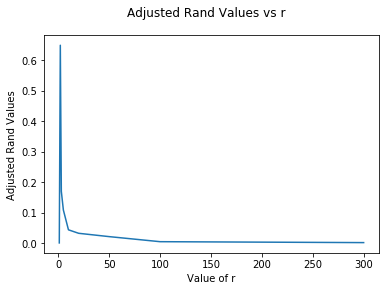

In [42]:
fig = plt.figure()
plt.plot(r_values, adjusted_rand_values)
fig.suptitle('Adjusted Rand Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Adjusted Rand Values')

Text(0,0.5,u'Adjusted Mutual Info Values')

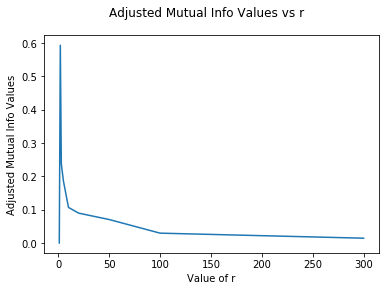

In [43]:
fig = plt.figure()
plt.plot(r_values, adjusted_mutual_info_values)
fig.suptitle('Adjusted Mutual Info Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Adjusted Mutual Info Values')

Best model is obtained for r = 2

In [49]:
nmf_model = NMF(n_components=2)
train_x = nmf_model.fit_transform(tfidf_train_x)
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=20, random_state=52)
km.fit(train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
print('Dimensions of the TFIDF matrix are: ' + str(tfidf_train_x.shape))
print('Contingency Matrix for r: ' + str(2) + '\n' + str(contingency_matrix(train_y, km.labels_)))


Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.680
Adjusted Rand-Index: 0.777
Adjusted Mutual Info: 0.679
Dimensions of the TFIDF matrix are: (7882, 27768)
Contingency Matrix for r: 2
[[3594  309]
 [ 158 3821]]


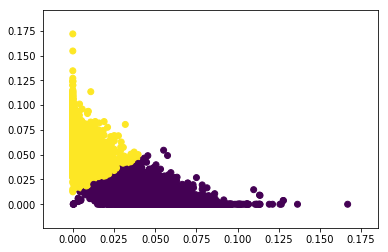

In [50]:
best_train = tfidf_train_x[:,:2]
#km.fit(best_train)
#y_kmeans = km.predict(tfidf_train_x)
fig = plt.figure()

plt.scatter(train_x[:, 0], train_x[:, 1], c=km.labels_)

plt.show()

<h3>Normalizing Features</h3>

Contingency Matrix: 
[[3462  441]
 [  80 3899]]
Homogeneity: 0.669
Completeness: 0.674
V-measure: 0.671
Adjusted Rand-Index: 0.753
Adjusted Mutual Info: 0.669


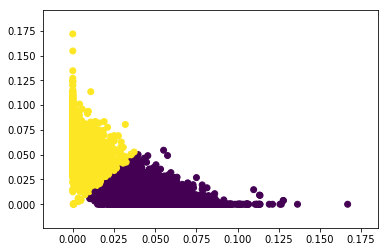

In [51]:
normalized_train_x = normalize(train_x, norm='l2', axis=0)
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=52)
km.fit(normalized_train_x)
print("Contingency Matrix: \n"  + str(contingency_matrix(train_y, km.labels_)))
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
fig = plt.figure()

plt.scatter(train_x[:, 0], train_x[:, 1], c=km.labels_)

plt.show()

<h3>Logarithmic Transformation</h3>

In [28]:
print(train_x)

[[0.02729578 0.00991328 0.00902945]
 [0.01878186 0.         0.18879377]
 [0.04183361 0.         0.00518696]
 ...
 [0.0231426  0.02223406 0.00027609]
 [0.00490784 0.03083239 0.01204874]
 [0.01873975 0.0112075  0.        ]]


Contingency Matrix: 
[[3681  222]
 [ 176 3803]]
Homogeneity: 0.712
Completeness: 0.712
V-measure: 0.712
Adjusted Rand-Index: 0.808
Adjusted Mutual Info: 0.712


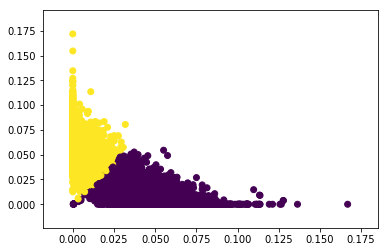

In [52]:
log_train_x = np.log(train_x + 1e-3)
#print(log_train_x)
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=20, random_state=52)
km.fit(log_train_x)
print("Contingency Matrix: \n"  + str(contingency_matrix(train_y, km.labels_)))
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
fig = plt.figure()

plt.scatter(train_x[:, 0], train_x[:, 1], c=km.labels_)

plt.show()

<h3>Normalizing Features And Logarithmic Transformation</h3>

Contingency Matrix: 
[[3602  301]
 [ 123 3856]]
Homogeneity: 0.703
Completeness: 0.705
V-measure: 0.704
Adjusted Rand-Index: 0.796
Adjusted Mutual Info: 0.703


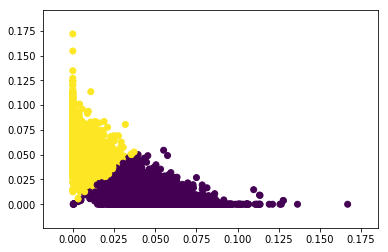

In [58]:
normalized_train_x = normalize(train_x, norm='l2')
log_train_x = np.log(normalized_train_x + 1e-1)
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=20, random_state=52)
km.fit(log_train_x)
print("Contingency Matrix: \n"  + str(contingency_matrix(train_y, km.labels_)))
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
fig = plt.figure()

plt.scatter(train_x[:, 0], train_x[:, 1], c=km.labels_)

plt.show()

<h3>Logarithmic Transformation And Normalizing Features</h3>

Contingency Matrix: 
[[3522  381]
 [ 105 3874]]
Homogeneity: 0.678
Completeness: 0.681
V-measure: 0.680
Adjusted Rand-Index: 0.769
Adjusted Mutual Info: 0.678


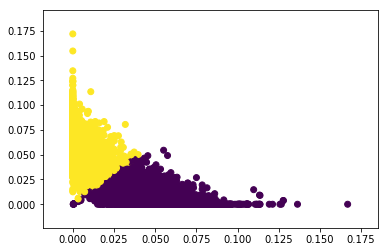

In [61]:
log_train_x = np.log(train_x + 1e-3)
normalized_train_x = normalize(log_train_x, norm='l2')
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=20, random_state=52)
km.fit(normalized_train_x)
print("Contingency Matrix: \n"  + str(contingency_matrix(train_y, km.labels_)))
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
fig = plt.figure()

plt.scatter(train_x[:, 0], train_x[:, 1], c=km.labels_)

plt.show()